# [과제 3] 로지스틱 회귀분석
### - sklearn 패키지를 사용해 로지스틱 회귀분석을 진행해주세요.
### - 성능지표를 계산하고 이에 대해 해석해주세요.
### - 성능 개선을 시도해주세요. (어떠한 성능지표를 기준으로 개선을 시도했는지, 그 이유도 함께 적어주세요.)
### - 주석으로 설명 및 근거 자세하게 달아주시면 감사하겠습니다. :)

## Data 

출처 : https://www.kaggle.com/mlg-ulb/creditcardfraud


* V1 ~ V28 : 비식별화 된 개인정보 
* **Class** : Target 변수  
  - 1 : fraudulent transactions (사기)
  - 0 : otherwise 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

# Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# data imbalance
from imblearn.over_sampling import *
from imblearn.under_sampling import *
from imblearn.combine import *


# Metric
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv("assignment3_creditcard.csv")

In [3]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.848212,2.384900,0.379573,1.048381,-0.845070,2.537837,-4.542983,-10.201458,-1.504967,-2.234167,...,2.585817,-5.291690,0.859364,0.423231,-0.506985,1.020052,-0.627751,-0.017753,0.280982,0
1,2.071805,-0.477943,-1.444444,-0.548657,0.010036,-0.582242,-0.042878,-0.247160,1.171923,-0.342382,...,-0.077306,0.042858,0.390125,0.041569,0.598427,0.098803,0.979686,-0.093244,-0.065615,0
2,-2.985294,-2.747472,1.194068,-0.003036,-1.151041,-0.263559,0.553500,0.635600,0.438545,-1.806488,...,1.345776,0.373760,-0.385777,1.197596,0.407229,0.008013,0.762362,-0.299024,-0.303929,0
3,-1.479452,1.542874,0.290895,0.838142,-0.529290,-0.717661,0.484516,0.545092,-0.780767,0.324804,...,0.038397,0.116771,0.405560,-0.116453,0.541275,-0.216665,-0.415578,0.027126,-0.150347,0
4,-0.281976,-0.309699,-2.162299,-0.851514,0.106167,-1.483888,1.930994,-0.843049,-1.249272,1.079608,...,-0.875516,-0.004199,1.015108,-0.026748,0.077115,-1.468822,0.751700,0.496732,0.331001,0


In [4]:
data.shape

(28678, 29)

In [5]:
# train과 test를 0.75 : 0.25 비율로 나누었다.
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, :-1], data.iloc[:, -1], test_size = 0.25, random_state = 0)

# 모델 생성 및 평가

In [6]:
model = LogisticRegression(C = 1)  # 규제 : l2 , 규제 강도(C) : 1
model.fit(X_train, y_train)
pred_y = model.predict(X_test)

In [7]:
print(f"accuracy:{accuracy_score(y_test, pred_y)}")
print(f"Precision : {precision_score(y_test, pred_y)}")
print(f"Recall : {recall_score(y_test, pred_y)}")
print(f"F1 : {f1_score(y_test, pred_y)}")

accuracy:0.997907949790795
Precision : 0.9111111111111111
Recall : 0.7884615384615384
F1 : 0.845360824742268


- 정확도가 높은 반면 Recall이 상대적으로 낮은 것을 보아 데이터의 불균형 문제가 의심된다.

# 데이터 분포 확인

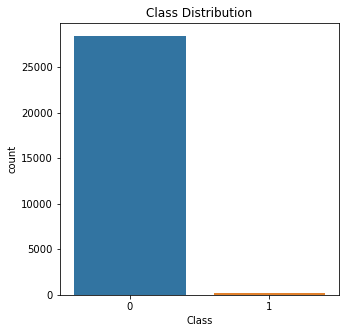

In [8]:
plt.figure(figsize = (5,5))
sns.countplot(x = data['Class'])
plt.title('Class Distribution')
plt.show()

- 역시나 데이터 불균형 문제가 심각했다.

# 데이터 불균형 문제 해결 - sampling

## 오버샘플링

In [9]:
smote = SMOTE(random_state=42)
X_train_over, y_train_over = smote.fit_resample(X_train,y_train)

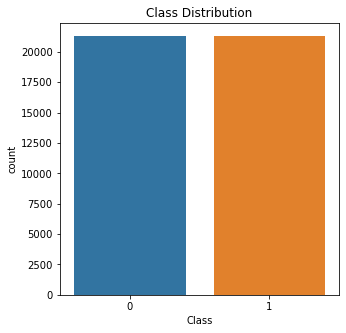

In [10]:
plt.figure(figsize = (5,5))
sns.countplot(x = y_train_over)
plt.title('Class Distribution')
plt.show()

In [11]:
model = LogisticRegression(C = 1)  # 규제 : l2 , 규제 강도(C) : 1
model.fit(X_train_over, y_train_over)
pred_y = model.predict(X_test)

In [12]:
print(f"accuracy:{accuracy_score(y_test, pred_y)}")
print(f"Precision : {precision_score(y_test, pred_y)}")
print(f"Recall : {recall_score(y_test, pred_y)}")
print(f"F1 : {f1_score(y_test, pred_y)}")

accuracy:0.9690376569037656
Precision : 0.1897810218978102
Recall : 1.0
F1 : 0.31901840490797545


- Recall은 올라갔지만 Precision이 급격히 떨어지는 사태가 발생했다.

## 언더샘플링

### RandomUnderSampler

In [13]:
under = RandomUnderSampler()
X_train_under, y_train_under = under.fit_resample(X_train,y_train)

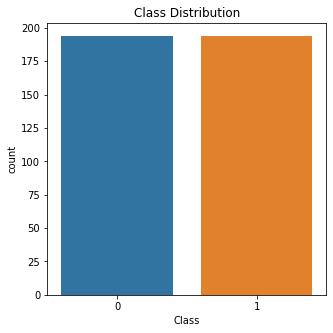

In [14]:
plt.figure(figsize = (5,5))
sns.countplot(x = y_train_under)
plt.title('Class Distribution')
plt.show()

In [15]:
model = LogisticRegression(C = 1)  # 규제 : l2 , 규제 강도(C) : 1
model.fit(X_train_under, y_train_under)
pred_y = model.predict(X_test)

In [16]:
print(f"accuracy:{accuracy_score(y_test, pred_y)}")
print(f"Precision : {precision_score(y_test, pred_y)}")
print(f"Recall : {recall_score(y_test, pred_y)}")
print(f"F1 : {f1_score(y_test, pred_y)}")

accuracy:0.9461645746164574
Precision : 0.11697247706422019
Recall : 0.9807692307692307
F1 : 0.209016393442623


- 예상은 했지만 데이터의 개수를 무작위로 줄이기 때문에 성능이 많이 안좋아지는 것을 확인할 수 있다.

## 복합샘플링

In [33]:
mix = SMOTETomek()
X_train_under, y_train_under = mix.fit_resample(X_train,y_train)

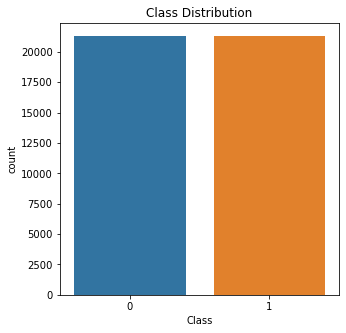

In [34]:
plt.figure(figsize = (5,5))
sns.countplot(x = y_train_under)
plt.title('Class Distribution')
plt.show()

In [35]:
model = LogisticRegression(C = 1)  # 규제 : l2 , 규제 강도(C) : 1
model.fit(X_train_under, y_train_under)
pred_y = model.predict(X_test)

In [36]:
print(f"accuracy:{accuracy_score(y_test, pred_y)}")
print(f"Precision : {precision_score(y_test, pred_y)}")
print(f"Recall : {recall_score(y_test, pred_y)}")
print(f"F1 : {f1_score(y_test, pred_y)}")

accuracy:0.9691771269177127
Precision : 0.19047619047619047
Recall : 1.0
F1 : 0.32


- 이상하게 Precision이 오르지 않는다.

In [21]:
mix = SMOTEENN()
X_train_under, y_train_under = mix.fit_resample(X_train,y_train)

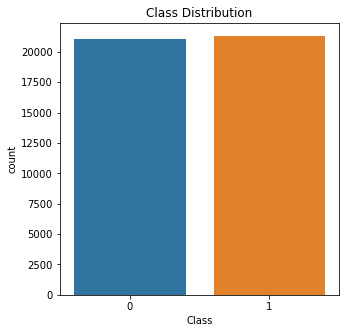

In [22]:
plt.figure(figsize = (5,5))
sns.countplot(x = y_train_under)
plt.title('Class Distribution')
plt.show()

In [23]:
model = LogisticRegression(C = 1)  # 규제 : l2 , 규제 강도(C) : 1
model.fit(X_train_under, y_train_under)
pred_y = model.predict(X_test)

In [24]:
print(f"accuracy:{accuracy_score(y_test, pred_y)}")
print(f"Precision : {precision_score(y_test, pred_y)}")
print(f"Recall : {recall_score(y_test, pred_y)}")
print(f"F1 : {f1_score(y_test, pred_y)}")

accuracy:0.9645746164574617
Precision : 0.16993464052287582
Recall : 1.0
F1 : 0.29050279329608936


- 샘플링으로 해결이 안된다

# 데이터 불균형 문제 해결 - cut off

In [27]:
model = LogisticRegression(C = 1)  # 규제 : l2 , 규제 강도(C) : 1
model.fit(X_train, y_train)
pred_y = model.predict(X_test)

In [29]:
pred_proba = model.predict_proba(X_test)

In [49]:
from sklearn.preprocessing import Binarizer

#Binarizer의 threshold 설정값. 분류 결정 임곗값임.  
custom_threshold = 0.3

# predict_proba( ) 반환값의 두번째 컬럼 , 즉 Positive 클래스 컬럼 하나만 추출하여 Binarizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 

custom_predict = binarizer.transform(pred_proba_1)

In [50]:
print(f"accuracy:{accuracy_score(y_test, custom_predict)}")
print(f"Precision : {precision_score(y_test, custom_predict)}")
print(f"Recall : {recall_score(y_test, custom_predict)}")
print(f"F1 : {f1_score(y_test, custom_predict)}")

accuracy:0.997907949790795
Precision : 0.8775510204081632
Recall : 0.8269230769230769
F1 : 0.8514851485148514


- threshold : 0.5 => F1 : 0.84 (기존)
- threshold : 0.2 => F1 : 0.87
- threshold : 0.8 => F1 : 0.77
- threshold : 0.1 => F1 : 0.86


**임계값을 0.2로 설정하였을 때 f1-score가 0.84 에서 0.87로 향상하였다.**